# Import Necessary Libraries

In [56]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data 

In [2]:
movies_data = pd.read_csv('my_movies.csv')
movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Data Understanding

In [3]:
movies_data.shape

(10, 15)

In [4]:
movies_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
movies_data.describe(include='all')

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10,10,7,2,1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
unique,4,5,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,6,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,NaN,NaN,NaN,NaN,NaN,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
movies_data.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

Since data is in good format so no data preprosessing needed

# Data Preprocessing 

Since V1-V5 features convey the information about the watched movies and those movies data is already in movies features and V1-V5 has null entries so we drop them.

In [7]:
movies_data = movies_data.drop(labels=['V1','V2','V3','V4','V5'],axis=1)

In [8]:
movies_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## 1. Association rules with default parameter values. ie 50% support and 80%,100% and 200% confidence

### 50% support

In [57]:
frequent_items = apriori(movies_data,min_support=0.5,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


### 80% confidence

In [58]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


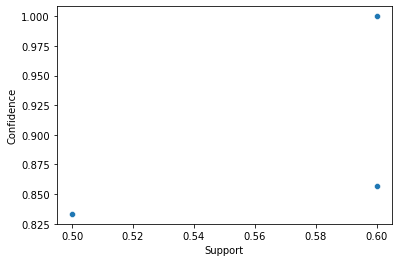

In [59]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [60]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


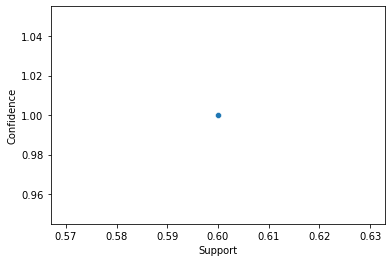

In [61]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [62]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 2. Association rules with values 40% support and 80%,100% and 200% confidence

### 40% support

In [63]:
frequent_items = apriori(movies_data,min_support=0.4,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


### 80% confidence

In [64]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


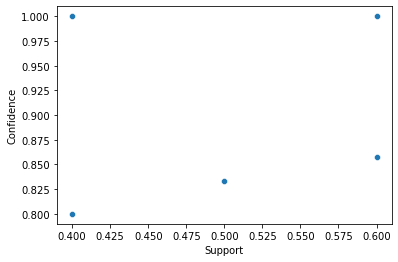

In [65]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [66]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


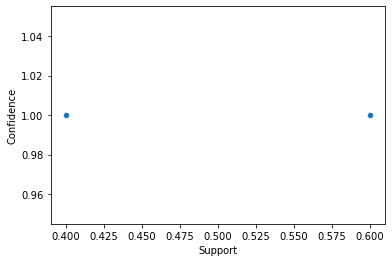

In [67]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [68]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 3. Association rules with values 30% support and 80%,100% and 200% confidence

### 30% support

In [69]:
frequent_items = apriori(movies_data,min_support=0.3,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


### 80% confidence

In [70]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


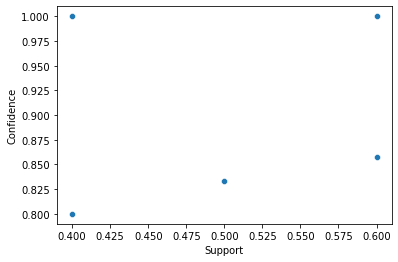

In [71]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [72]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


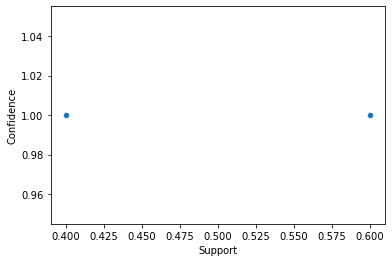

In [73]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [74]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 4. Association rules with values 20% support and 80%,100% and 200% confidence

### 20% support

In [75]:
frequent_items = apriori(movies_data,min_support=0.2,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


### 80% confidence

In [76]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


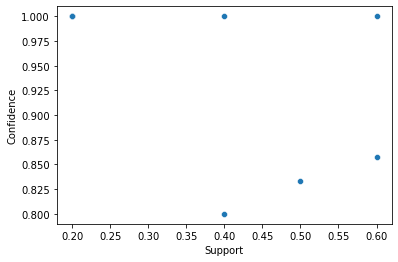

In [77]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [78]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


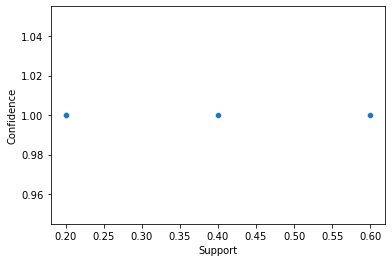

In [79]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [80]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 5. Association rules with values 10% support and 80%,100% and 200% confidence

### 10% support

In [81]:
frequent_items = apriori(movies_data,min_support=0.1,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### 80% confidence

In [82]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Harry Potter1, LOTR1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


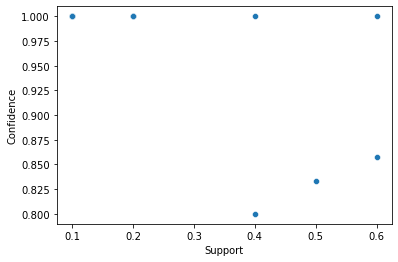

In [83]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [84]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Harry Potter1, LOTR1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


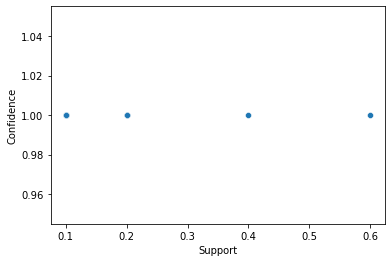

In [85]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [86]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 6. Association rules with values 5% support and 80%,100% and 200% confidence

### 5% support

In [87]:
frequent_items = apriori(movies_data,min_support=0.05,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### 80% confidence

In [88]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Harry Potter1, LOTR1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


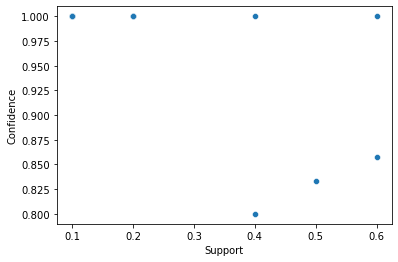

In [89]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [90]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Harry Potter1, LOTR1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


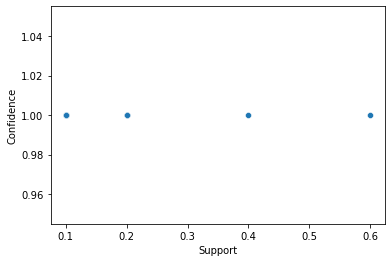

In [91]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [92]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=2)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For 200% confidence there is no associates

## 7. Association rules with values 10% support and 80% and changing max_length

### 7.1 . 10% support and max_length 1

In [93]:
frequent_items = apriori(movies_data,min_support=0.1,use_colnames=True,max_len=1)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### 80% confidence

In [94]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


For max_lenght= 1 there are no associates

### 7.2. 10% support and max_length 2

In [95]:
frequent_items = apriori(movies_data,min_support=0.1,use_colnames=True,max_len=2)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### 80% confidence

In [96]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


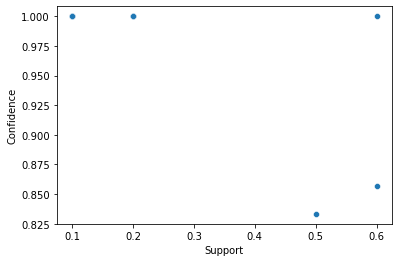

In [97]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 7.3. 10% support and max_length 3

In [98]:
frequent_items = apriori(movies_data,min_support=0.1,use_colnames=True,max_len=3)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### 80% confidence

In [99]:
best_associates = association_rules(frequent_items,metric='confidence',min_threshold=0.8)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


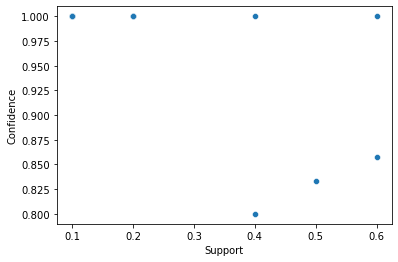

In [100]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# ============================THE END=========================